In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is A09C-8A30

 Directory of C:\Users\Ahmed-Basem\Desktop\Current\Corelia\Task 2

05/07/2023  04:25 PM    <DIR>          .
05/07/2023  04:25 PM    <DIR>          ..
05/03/2023  05:26 PM    <DIR>          .ipynb_checkpoints
03/01/2021  06:50 AM           530,389 Data_Train.xlsx
05/07/2023  04:25 PM         1,128,230 Regression.ipynb
02/15/2020  09:10 AM           120,774 Test_set.xlsx
               3 File(s)      1,779,393 bytes
               3 Dir(s)  17,418,244,096 bytes free


In [3]:
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Get insights about the dataset

In [4]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns in our dataset")

There are 10683 Rows and 11 Columns in our dataset


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# get the count of null values in every column in our dataset
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
def get_insights(column):
    print(f"### Columns in {column} ")
    print("\n### most appeared values ")
    print(data[column].value_counts().index[:5].values)
    print(f"\n### Number of unique values is \n{data[column].nunique()} ")
    print('\n#### Random Values ####')
    print(data.sample(5)[column].values)

### Visulaization

In [11]:
def count_plot(col,title):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col)
    plt.xticks(rotation=30)
    plt.title(title)
    plt.show()
def moreVar_count_plot(col,col2):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col,hue=col2)
    plt.xticks(rotation=45)
    plt.show()
def pie_plot(col,limit=10,title=''):
    plt.figure(figsize=(10,6))
    plt.pie(x=data[col].value_counts()[:limit],labels=data[col].value_counts()[:limit].index,
           autopct='%1.1f%%')
    plt.title(title)
    plt.show()
def col_vs_price(col,title):
    plt.figure(figsize=(10,6))
    mean_data = data.groupby(col).mean()
    mean_data['Price'] = mean_data['Price'].astype(int)
    mean_data.reset_index(inplace=True)
    mean_data.plot.barh(x=col,y='Price')
    plt.title(title)
    plt.show()
def kde_plot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=data[col],shade=True)
    plt.show()
def scatter_plot(col1,col2,title):
    plt.figure(figsize=(10,6))
    plt.scatter(data[col1], data[col2])
    plt.title(title)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [12]:
get_insights('Airline')

### Columns in Airline 

### most appeared values 
['Jet Airways' 'IndiGo' 'Air India' 'Multiple carriers' 'SpiceJet']

### Number of unique values is 
12 

#### Random Values ####
['Air India' 'IndiGo' 'Air India' 'Jet Airways' 'Jet Airways']


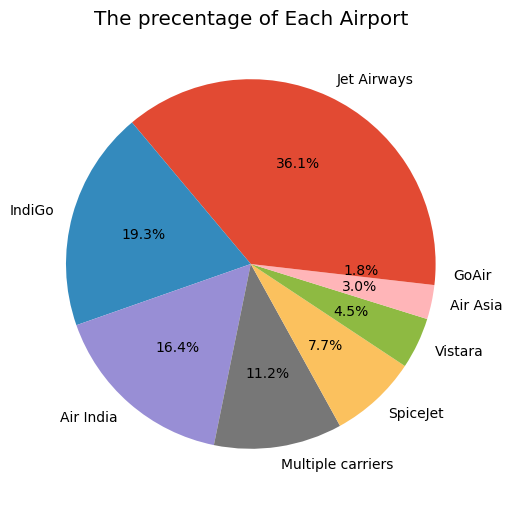

In [13]:
pie_plot('Airline',8,'The precentage of Each Airport')

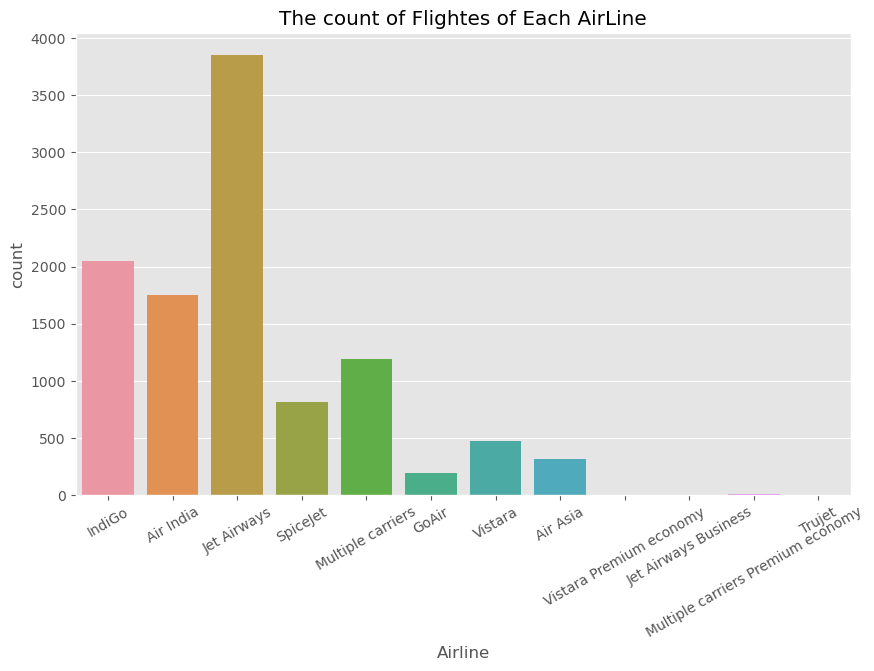

In [14]:
count_plot('Airline','The count of Flightes of Each AirLine')

<Figure size 1000x600 with 0 Axes>

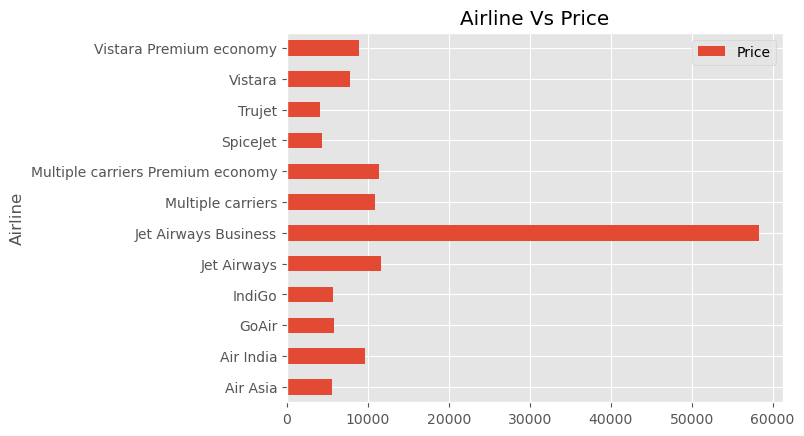

In [15]:
col_vs_price('Airline','Airline Vs Price')

In [16]:
get_insights('Date_of_Journey')

### Columns in Date_of_Journey 

### most appeared values 
['18/05/2019' '6/06/2019' '21/05/2019' '9/06/2019' '12/06/2019']

### Number of unique values is 
44 

#### Random Values ####
['18/05/2019' '1/06/2019' '24/05/2019' '27/03/2019' '9/03/2019']


In [17]:
data['day'] = data['Date_of_Journey'].apply(lambda x:int(x.split('/')[0]))
data['month'] = data['Date_of_Journey'].apply(lambda x:int(x.split('/')[1]))
# data['year'] = data['Date_of_Journey'].apply(lambda x:int(x.split('/')[2]))
data = data.drop('Date_of_Journey',axis=1)

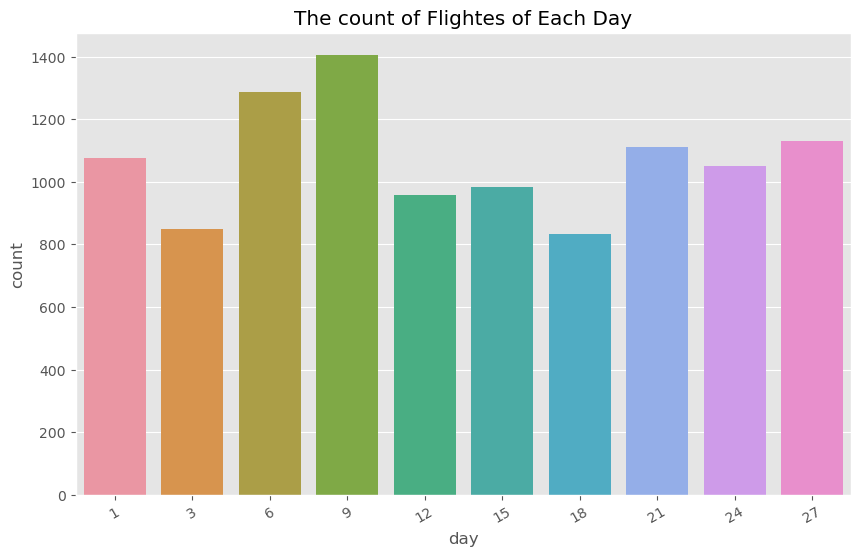

In [18]:
count_plot('day','The count of Flightes of Each Day')

<Figure size 1000x600 with 0 Axes>

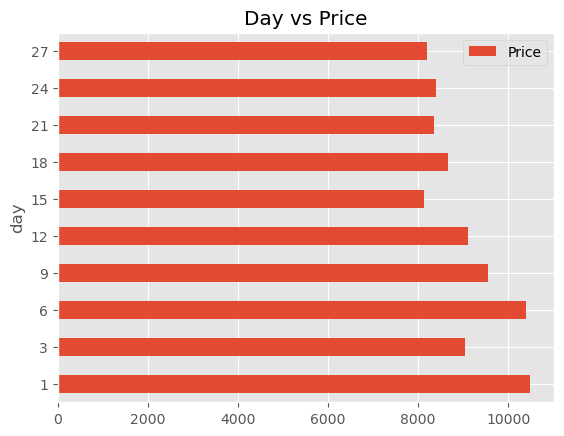

In [19]:
col_vs_price('day','Day vs Price')

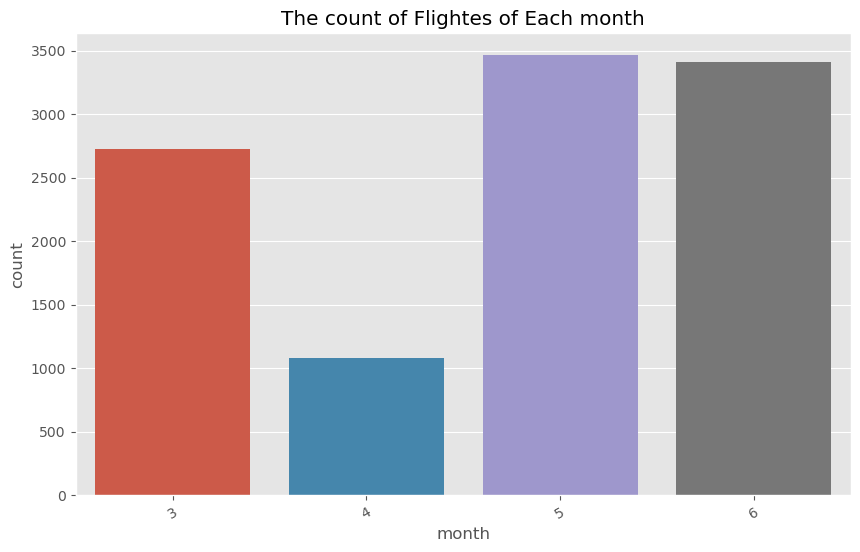

In [20]:
count_plot('month','The count of Flightes of Each month')

<Figure size 1000x600 with 0 Axes>

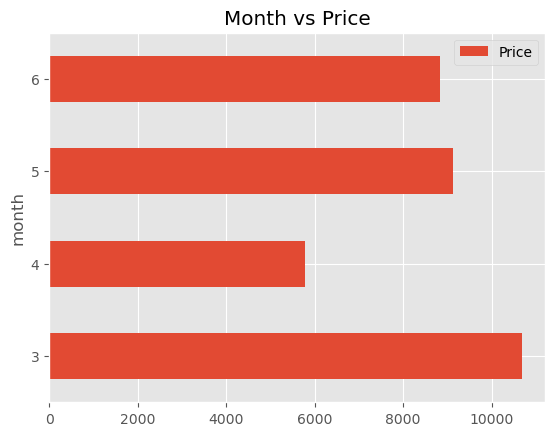

In [21]:
col_vs_price('month','Month vs Price')

In [22]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [23]:
get_insights('Source')

### Columns in Source 

### most appeared values 
['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']

### Number of unique values is 
5 

#### Random Values ####
['Banglore' 'Kolkata' 'Kolkata' 'Delhi' 'Kolkata']


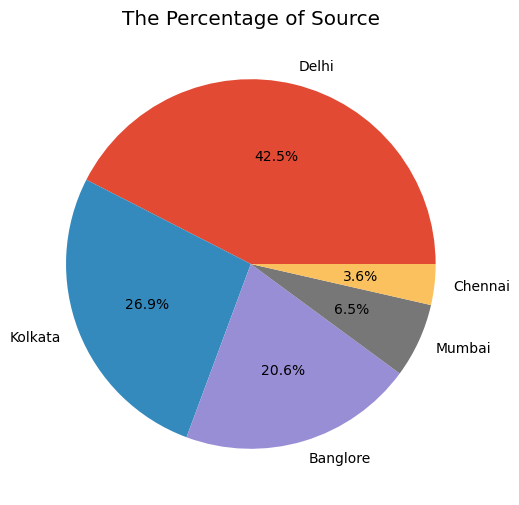

In [24]:
pie_plot('Source',title="The Percentage of Source")

<Figure size 1000x600 with 0 Axes>

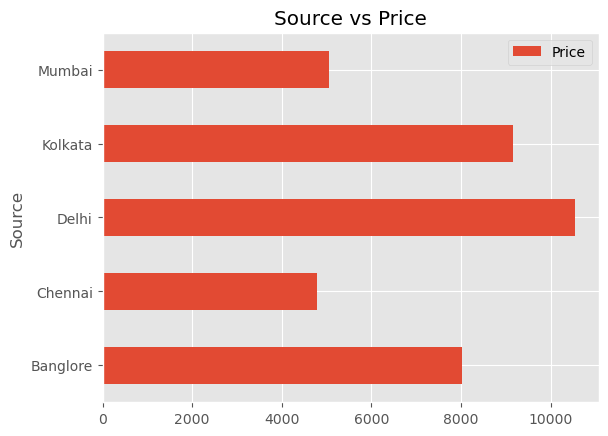

In [25]:
col_vs_price('Source','Source vs Price')

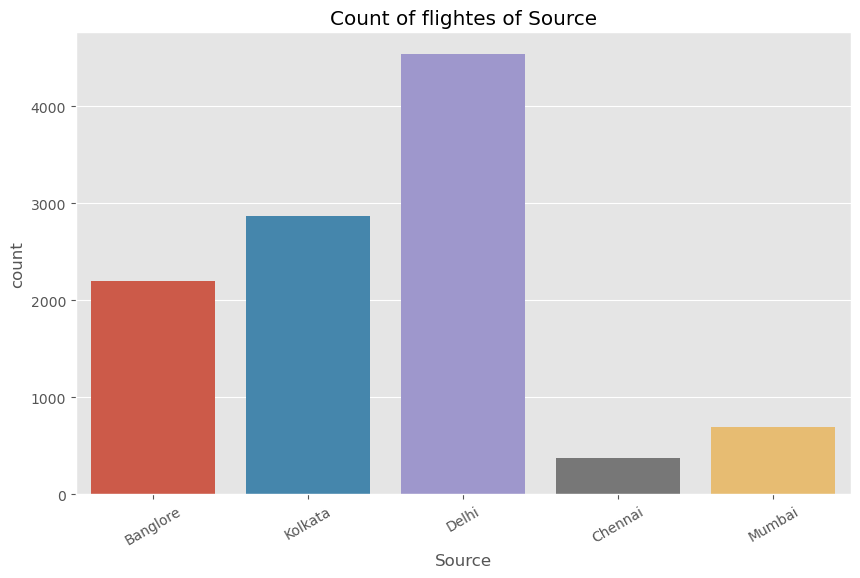

In [26]:
count_plot("Source",'Count of flightes of Source')

In [27]:
get_insights('Destination')

### Columns in Destination 

### most appeared values 
['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad']

### Number of unique values is 
6 

#### Random Values ####
['Banglore' 'Delhi' 'Cochin' 'New Delhi' 'Cochin']


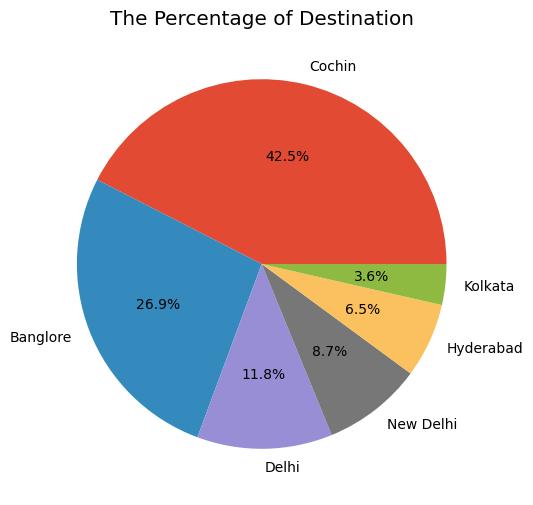

In [28]:
pie_plot('Destination',title="The Percentage of Destination")

<Figure size 1000x600 with 0 Axes>

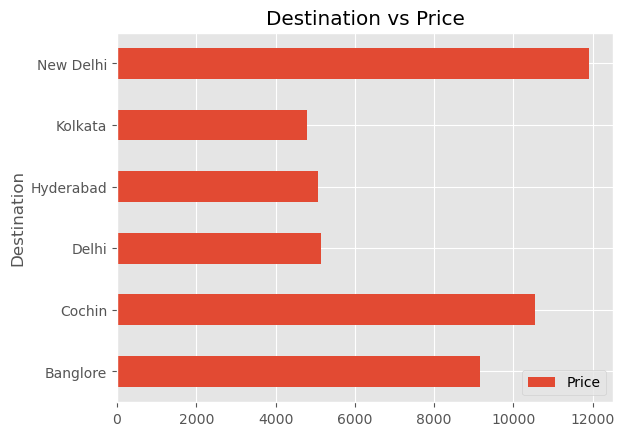

In [29]:
col_vs_price('Destination','Destination vs Price')

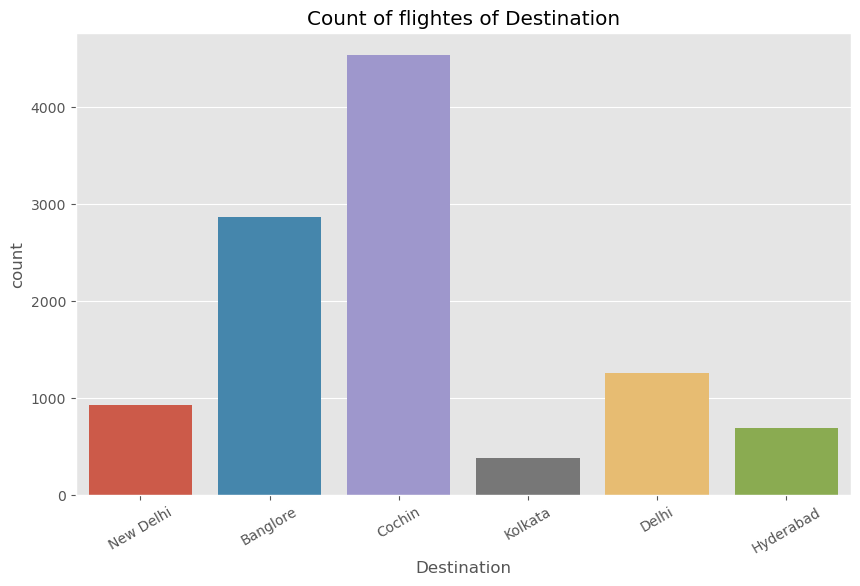

In [30]:
count_plot("Destination",'Count of flightes of Destination')

In [31]:
get_insights('Route')

### Columns in Route 

### most appeared values 
['DEL → BOM → COK' 'BLR → DEL' 'CCU → BOM → BLR' 'CCU → BLR' 'BOM → HYD']

### Number of unique values is 
128 

#### Random Values ####
['BLR → DEL' 'BLR → DEL' 'CCU → BOM → BLR' 'BLR → DEL' 'CCU → BLR']


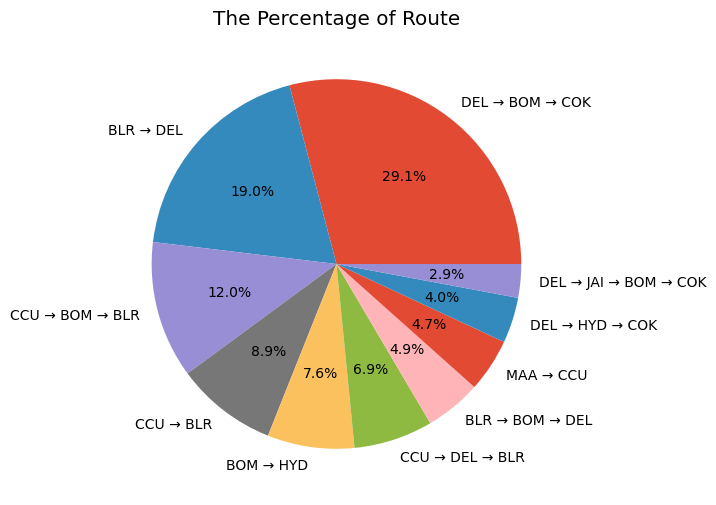

In [32]:
pie_plot('Route',title="The Percentage of Route",limit=10)

In [33]:
# def route_len(route):
#     try:
#         route = len(route.split('→'))
#         return route
#     except:
#         print(route)
#         return 0

In [34]:
# data['route_len'] = data['Route'].apply(route_len)

In [35]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [36]:
data = data.drop(['Route'],axis=1)

In [37]:
get_insights('Dep_Time')

### Columns in Dep_Time 

### most appeared values 
['18:55' '17:00' '07:05' '10:00' '07:10']

### Number of unique values is 
222 

#### Random Values ####
['13:00' '13:20' '22:00' '15:00' '02:15']


In [38]:
def get_Dep_hour(time):
    hour = time.split(":")[0]
    return int(hour)

In [39]:
get_Dep_hour('18:55')

18

In [40]:
data['Dep_Time'] = data['Dep_Time'].apply(get_Dep_hour)

In [41]:
get_insights('Dep_Time')

### Columns in Dep_Time 

### most appeared values 
[ 9  7  8 17  6]

### Number of unique values is 
24 

#### Random Values ####
[17 23 18  5 14]


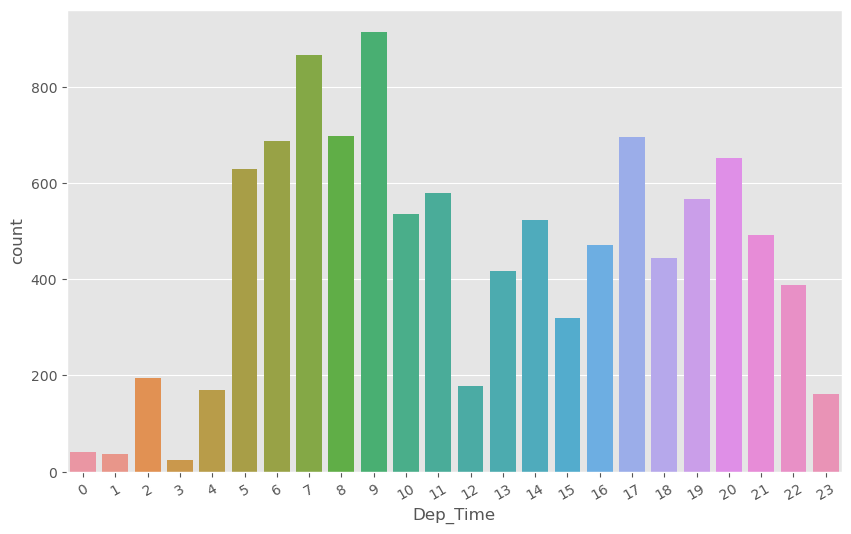

In [42]:
count_plot('Dep_Time',"")

<Figure size 1000x600 with 0 Axes>

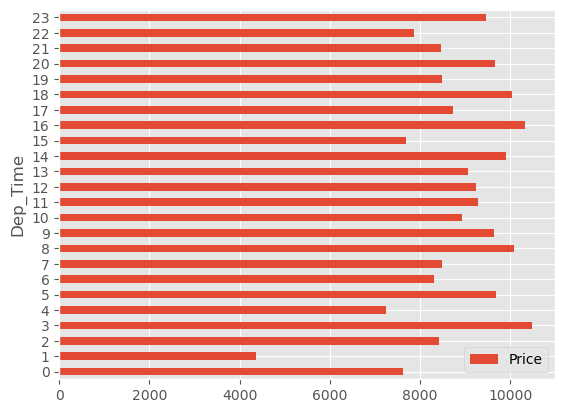

In [43]:
col_vs_price('Dep_Time',"")

In [44]:
get_insights('Arrival_Time')

### Columns in Arrival_Time 

### most appeared values 
['19:00' '21:00' '19:15' '16:10' '12:35']

### Number of unique values is 
1343 

#### Random Values ####
['19:40' '11:25' '07:55' '04:25 28 May' '18:50']


In [45]:
def get_Dep_hour(time):
    hour = time.split(":")[0]
    return int(hour)

In [46]:
data['Arrival_Time'] = data['Arrival_Time'].apply(get_Dep_hour)

In [47]:
get_insights('Arrival_Time')

### Columns in Arrival_Time 

### most appeared values 
[19 12  4 21 22]

### Number of unique values is 
24 

#### Random Values ####
[ 9  8 13 11  7]


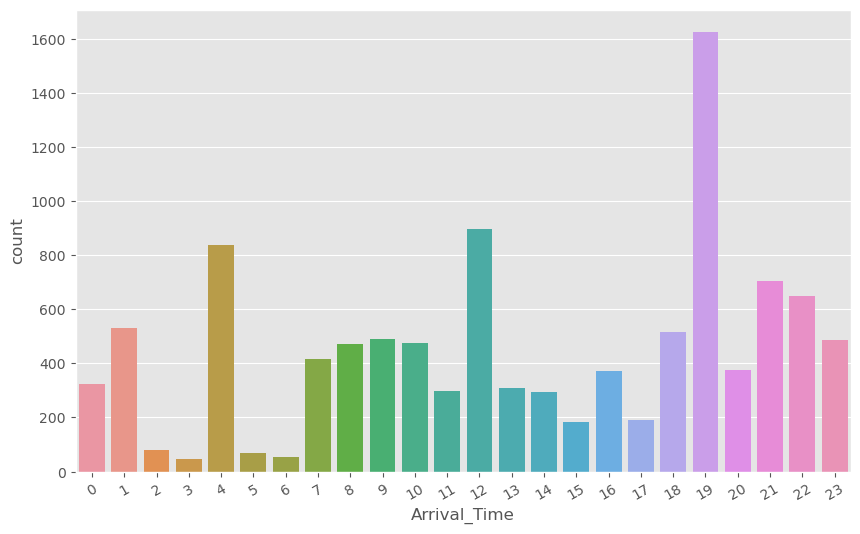

In [48]:
count_plot('Arrival_Time',"")

<Figure size 1000x600 with 0 Axes>

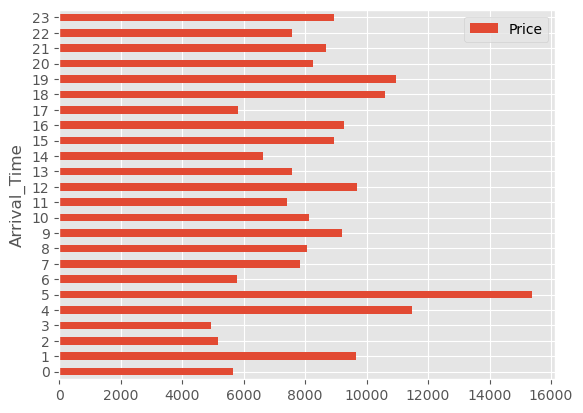

In [49]:
col_vs_price('Arrival_Time',"")

In [50]:
get_insights('Duration')

### Columns in Duration 

### most appeared values 
['2h 50m' '1h 30m' '2h 45m' '2h 55m' '2h 35m']

### Number of unique values is 
368 

#### Random Values ####
['4h 25m' '3h 15m' '13h' '27h' '18h 50m']


In [51]:
def convert_time_minute(time):
    if "m" in time:
        time = time.replace('m',"")
        if "h" not in time:
            hours = 0
            mintues = time.split(" ")[0]
        else:
            time = time.replace('h',"")
            hours = time.split(" ")[0]
            mintues = time.split(" ")[1]
        total = int(hours) * 60 + int(mintues)
    else:
        time = time.replace('h',"")
        total = int(time) * 60

    
    
    return total

In [52]:
data['Duration'] = data['Duration'].apply(convert_time_minute)

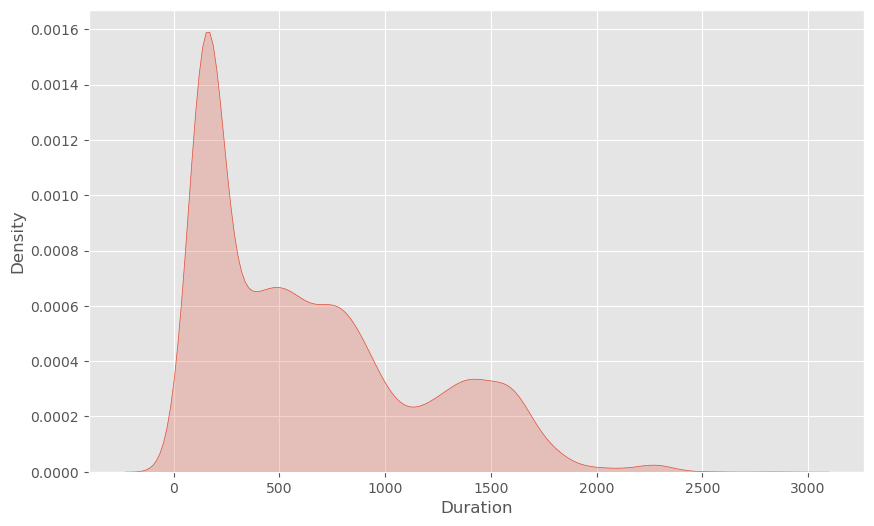

In [53]:
kde_plot('Duration')

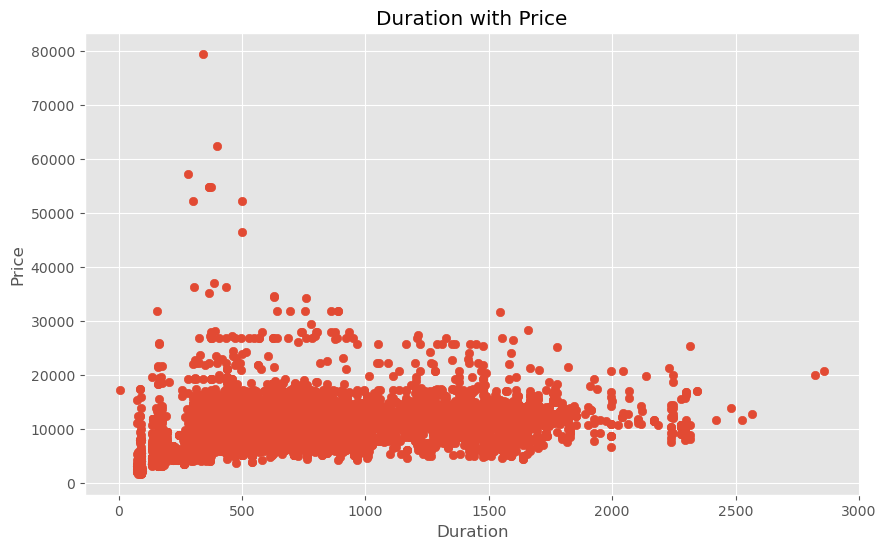

In [54]:
scatter_plot('Duration','Price',"Duration with Price")

<AxesSubplot:xlabel='Duration'>

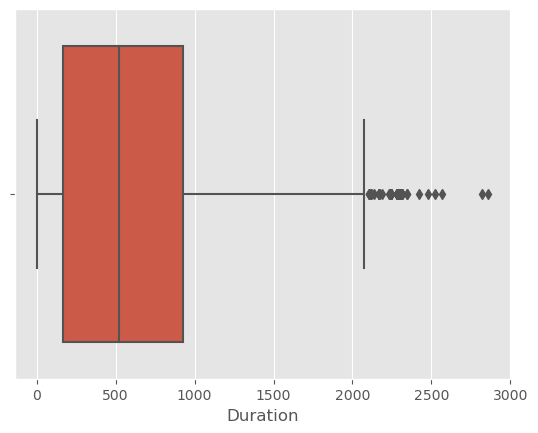

In [55]:
sns.boxplot(data=data,x='Duration')

In [56]:
statistic = data['Duration'].describe()
statistic

count    10682.000000
mean       643.020502
std        507.830133
min          5.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: Duration, dtype: float64

In [57]:
quartile_1 = statistic['25%']
quartile_3 = statistic['75%']
IQR = quartile_3 - quartile_1
lower_bound = quartile_1 - 1.5 * IQR 
upper_bound = quartile_3 + 1.5 * IQR 

In [58]:
lower_bound , upper_bound

(-970.0, 2070.0)

In [59]:
data[data['Duration'] < 60]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
6474,Air India,Mumbai,Hyderabad,16,16,5,2 stops,No info,17327,6,3


In [60]:
data = data[data['Duration'] > 60]

In [61]:
data = data[data['Duration'] < 2070]

In [62]:
data['Duration'].describe()

count    10606.000000
mean       631.546766
std        490.549990
min         75.000000
25%        170.000000
50%        510.000000
75%        925.000000
max       2065.000000
Name: Duration, dtype: float64

<AxesSubplot:xlabel='Duration'>

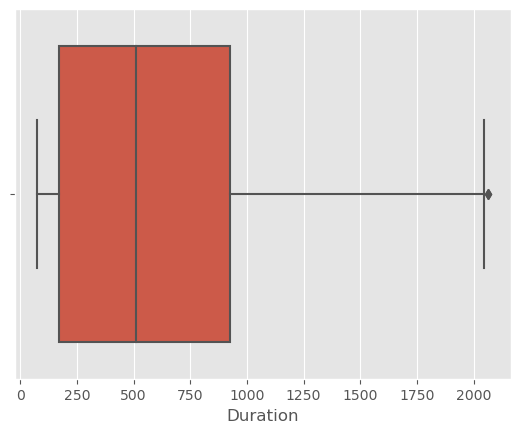

In [63]:
sns.boxplot(data=data,x='Duration')

In [64]:
len(data[data['Price'] > 30000])

24

In [65]:
data = data[data['Price'] < 30000]

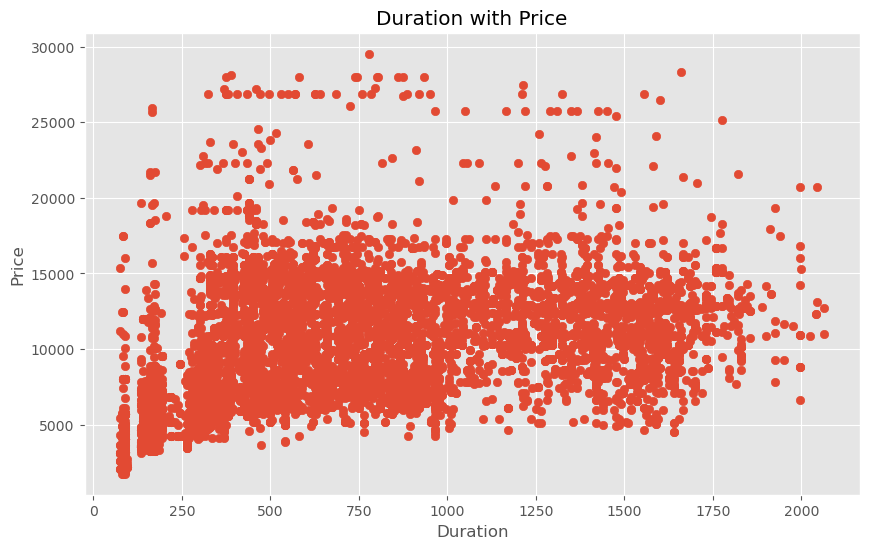

In [66]:
scatter_plot('Duration','Price',"Duration with Price")

In [67]:
get_insights('Total_Stops')

### Columns in Total_Stops 

### most appeared values 
['1 stop' 'non-stop' '2 stops' '3 stops' '4 stops']

### Number of unique values is 
5 

#### Random Values ####
['non-stop' '1 stop' '1 stop' '2 stops' '1 stop']


In [68]:
def convert_stops_int(stops):
    if "1" in stops:
        return  1
    elif "2" in stops:
        return 2
    elif "3" in stops:
        return 3
    elif "4" in stops:
        return 4
    else:
        return 0

In [69]:
data['Total_Stops'] = data['Total_Stops'].apply(convert_stops_int)

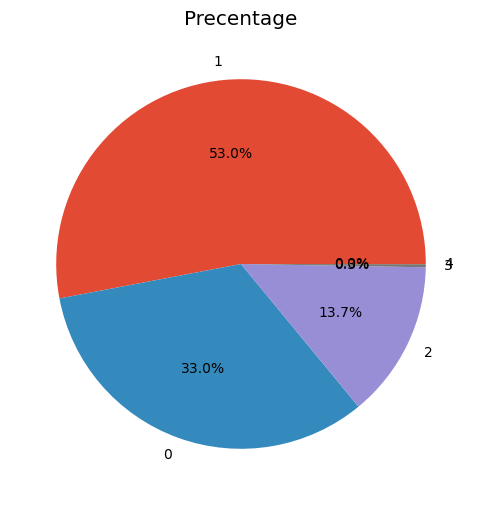

In [70]:
pie_plot('Total_Stops',5,"Precentage")

<Figure size 1000x600 with 0 Axes>

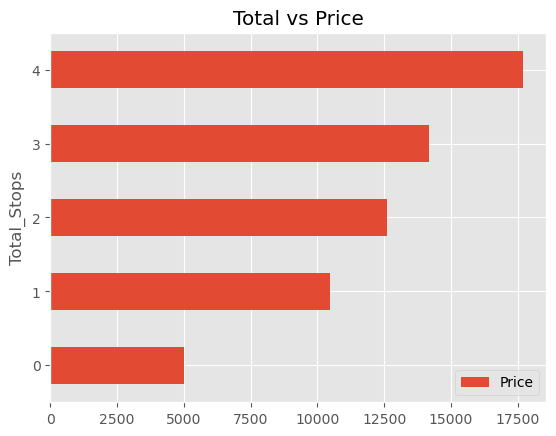

In [71]:
col_vs_price('Total_Stops','Total vs Price')

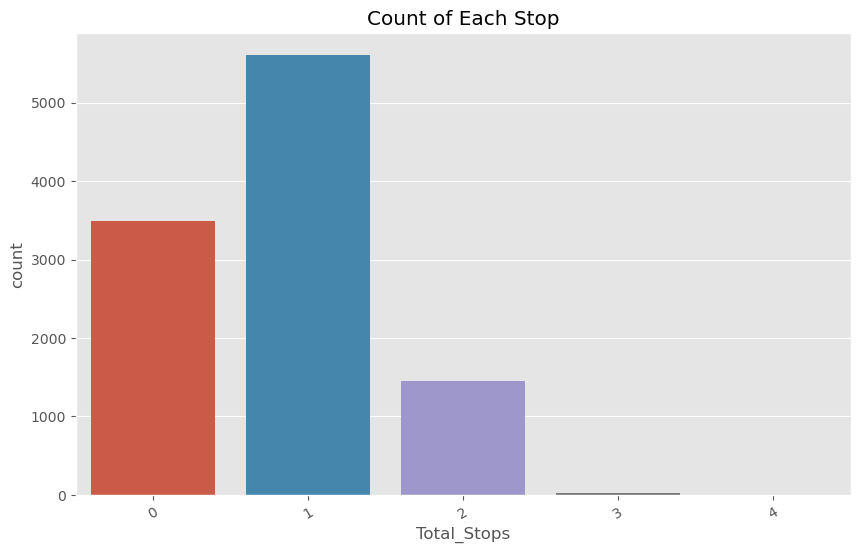

In [72]:
count_plot('Total_Stops','Count of Each Stop')

In [73]:
get_insights('Additional_Info')

### Columns in Additional_Info 

### most appeared values 
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Change airports']

### Number of unique values is 
10 

#### Random Values ####
['No info' 'Change airports' 'No info' 'In-flight meal not included'
 'In-flight meal not included']


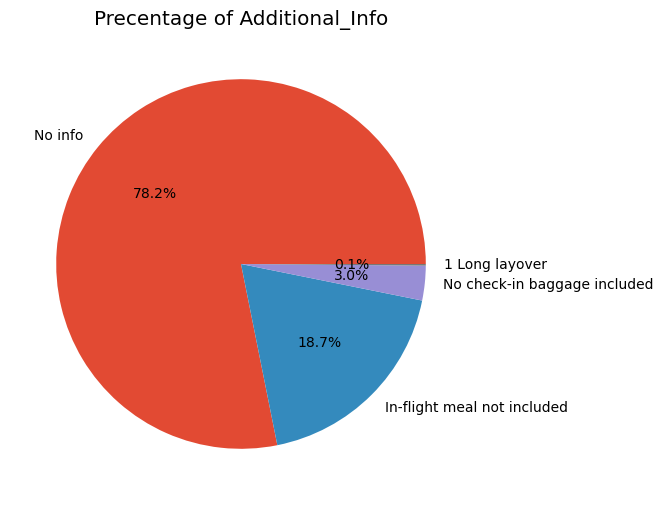

In [74]:
pie_plot('Additional_Info',4,"Precentage of Additional_Info")

<Figure size 1000x600 with 0 Axes>

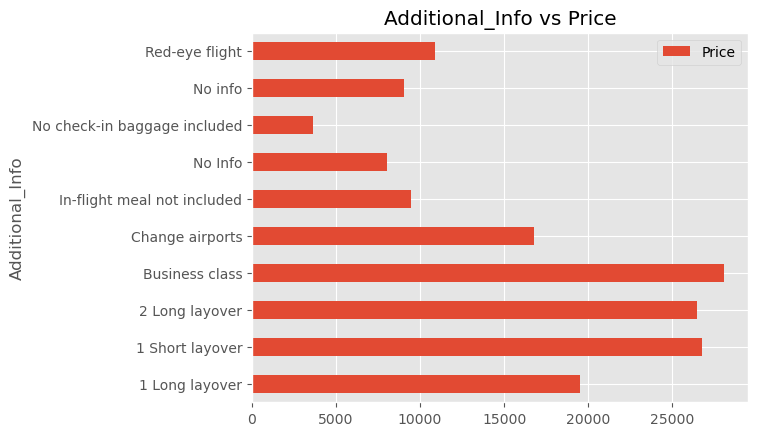

In [75]:
col_vs_price('Additional_Info','Additional_Info vs Price')

In [76]:
data['Additional_Info'].dtype

dtype('O')

In [77]:
X = data.drop('Price',axis=1)
Y = data['Price'].values

In [78]:
numerical = [col for col in X.columns if data[col].dtype != "O"]
numerical

['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'day', 'month']

In [79]:
categorical = [col for col in X.columns if data[col].dtype == "O"]
categorical

['Airline', 'Source', 'Destination', 'Additional_Info']

In [80]:
for col in categorical:
    print(col + " has : " + str(X[col].nunique()))

Airline has : 11
Source has : 5
Destination has : 6
Additional_Info has : 10


In [81]:
X.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month
0,IndiGo,Banglore,New Delhi,22,1,170,0,No info,24,3
1,Air India,Kolkata,Banglore,5,13,445,2,No info,1,5
2,Jet Airways,Delhi,Cochin,9,4,1140,2,No info,9,6
3,IndiGo,Kolkata,Banglore,18,23,325,1,No info,12,5
4,IndiGo,Banglore,New Delhi,16,21,285,1,No info,1,3


In [82]:
transform_pipeline = ColumnTransformer([
    ('num',StandardScaler(),numerical),
    ('category',OneHotEncoder(),categorical)
])

In [97]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.15,random_state =42)

In [98]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8994, 10), (1588, 10), (8994,), (1588,))

In [99]:
x_train = transform_pipeline.fit_transform(x_train).toarray()
x_train.shape

(8994, 38)

In [100]:
class LinearRegression():
    def __init__(self,lr,iterations):
        
        self.lr = lr
        self.iterations = iterations
        self.history = {"epoch":[],"loss":[]}
    def fit(self,x,y):
        n_samples , n_features = x.shape
        
        self.weights = np.random.randn(n_features)
        self.bais = 0
        
        for i in range(self.iterations):
            y_pred = np.dot(x,self.weights) + self.bais
            
            error = y_pred - y

            dW = (1 / n_samples) * np.dot(x.T,error)
            db = (1 / n_samples) * np.sum(error)

            self.weights = self.weights - self.lr * dW
            self.bais = self.bais - self.lr * db
            
            cost = self.score(x,y)
            self.history['epoch'].append(i+1)
            self.history['loss'].append(cost)
            
    def predict(self,x):
        
        net = np.dot(x,self.weights) + self.bais
        return net
     
    def score(self,x,y_true):
        y_pred = self.predict(x)
        
        error = (y_pred - y_true)**2
        mse = np.mean(error)
        rmse = np.sqrt(mse)

        return rmse
    
    def r2_score(self, x, y_true):
        
        y_pred = self.predict(x)
        sum_squared_regression = np.sum((y_true - y_pred)**2)
        total_sum_squares = np.sum((y_true - np.mean(y_true)) ** 2)
        
        r2 = 1 - (sum_squared_regression / total_sum_squares)
        return r2
    def get_parameter(self):
        
        return self.weights , self.bais

In [101]:
lr = LinearRegression(.5,5000)
lr.fit(x_train,y_train)

In [102]:
W,b = lr.get_parameter()
W

array([   68.71159684,   -94.07431484,   171.66434885,  1597.07367156,
        -523.16074128,  -406.3466574 , -1283.50538098,   527.61376047,
       -1116.45034161,  -920.79824157,  4901.68778175,  2727.02256079,
        2509.16494899, -1360.92246215,  -781.40629457,   978.24749742,
         518.3980761 ,  1985.92617775,  1344.52687382,  1503.32783733,
        1394.1615614 ,   470.64937195,  1393.24796182,  1503.86711609,
        -173.46509751,   472.22596782,  1345.05544133,  2156.51454425,
        5105.07382376,  2981.5926483 ,  2817.28632809,  2853.76374491,
        2130.2318035 , -5206.00714509, -1085.35053588, -1927.5438946 ,
       -1658.49907583,   686.90689674])

In [103]:
print(f'Model Accuracy on Training Data : {round(lr.r2_score(x_train,y_train) * 100)}')

Model Accuracy on Training Data : 70


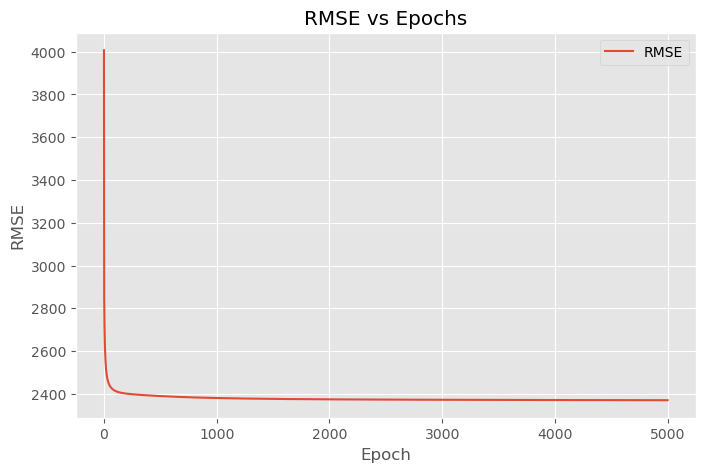

In [104]:
plt.figure(figsize=(8,5))
plt.plot(lr.history['loss'],label='RMSE')
plt.title('RMSE vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [105]:
x_test = transform_pipeline.transform(x_test).toarray()

In [106]:
print(f'RMSE Score in Test Data {lr.score(x_test,y_test)}')

RMSE Score in Test Data 2398.964264899446


In [107]:
print(f'Model Accuracy on Test Data {round(lr.r2_score(x_test,y_test) * 100)}')

Model Accuracy on Test Data 67


In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
rs = RandomForestRegressor().fit(x_train, y_train)
rs.score(x_train, y_train)

0.9852056879310049

In [110]:
rs.score(x_test, y_test)

0.9132494415399584